In [6]:
import numpy as np
import seaborn as sns

In [5]:
!pip install seaborn

     |████████████████████████████████| 286kB 1.2MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
source_link = 'https://www.kmk.org/fileadmin/Dateien/pdf/Statistik/Aus_Abiturnoten_2015.pdf'

In [3]:
abi_grades_2015 = {
    '1.0': 70,
    '1.1': 42,
    '1.2': 56,
    '1.3': 62,
    '1.4': 63,
    '1.5': 100,
    '1.6': 115,
    '1.7': 149,
    '1.8': 170,
    '1.9': 167,
    '2.0': 155,
    '2.1': 199,
    '2.2': 203,
    '2.3': 211,
    '2.4': 208,
    '2.5': 238,
    '2.6': 228,
    '2.7': 222,
    '2.8': 206,
    '2.9': 255,
    '3.0': 197,
    '3.1': 182,
    '3.2': 153,
    '3.3': 97,
    '3.4': 69,
    '3.5': 32,
    '3.6': 21,
    '3.7': 3,
    '3.8': 2,
    '3.9': 0,
    '4.0': 0
}

In [236]:
grades = [float(key) for key in abi_grades_2015.keys()]

values = [val for val in abi_grades_2015.values()]

In [235]:
abi_stats = {'grades': grades, 'values': values}

In [44]:
import matplotlib.pyplot as plt

In [87]:
all_data = [grade for i, grade in enumerate(grades) for val in range(values[i])]

In [88]:
np.unique(all_data, return_counts=True)

(array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
        3.6, 3.7, 3.8]),
 array([ 70,  42,  56,  62,  63, 100, 115, 149, 170, 167, 155, 199, 203,
        211, 208, 238, 228, 222, 206, 255, 197, 182, 153,  97,  69,  32,
         21,   3,   2]))

In [191]:
x_axis = np.linspace(1.0, 4.0, 50)
x_axis

array([1.        , 1.06122449, 1.12244898, 1.18367347, 1.24489796,
       1.30612245, 1.36734694, 1.42857143, 1.48979592, 1.55102041,
       1.6122449 , 1.67346939, 1.73469388, 1.79591837, 1.85714286,
       1.91836735, 1.97959184, 2.04081633, 2.10204082, 2.16326531,
       2.2244898 , 2.28571429, 2.34693878, 2.40816327, 2.46938776,
       2.53061224, 2.59183673, 2.65306122, 2.71428571, 2.7755102 ,
       2.83673469, 2.89795918, 2.95918367, 3.02040816, 3.08163265,
       3.14285714, 3.20408163, 3.26530612, 3.32653061, 3.3877551 ,
       3.44897959, 3.51020408, 3.57142857, 3.63265306, 3.69387755,
       3.75510204, 3.81632653, 3.87755102, 3.93877551, 4.        ])

In [192]:
from sklearn.neighbors import KernelDensity

In [200]:
kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
kde.fit(np.array(all_data).reshape(-1, 1))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.1, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

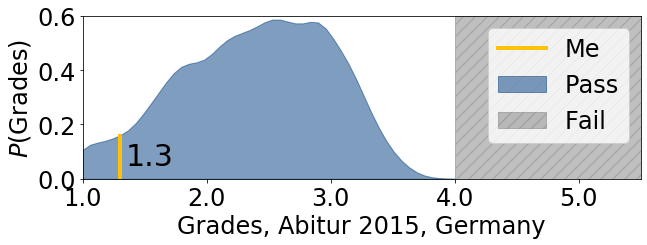

In [234]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.rcParams.update({'font.size': 24})
logprob = kde.score_samples(np.array(x_axis).reshape(-1, 1))
density = np.exp(logprob)
ax.fill_between(x_axis, density, alpha=0.5, label='Pass', color='#003C7E')
fail_axis = np.array([4.0, 6.0])
fail_area = np.array([0.6, 0.6])
ax.fill_between(fail_axis, fail_area, alpha=0.5, color='grey', hatch='//', label='Fail')
ax.set_xlabel('Grades, Abitur 2015, Germany')
ax.set_ylabel(r"$P($Grades$)$")
y_scaling = 0.6
ax.axvline(x=1.3, ymin=0.0, ymax=density[5] / y_scaling * 0.97, c='#FFC107', label="Me", linewidth=4)
ax.text(1.35, 0.05, "1.3", fontsize=30)
xt = ax.get_xticks()
yt = ax.get_yticks()

xt1 = xt.tolist()
ax.set_xticks(xt)
ax.set_xticklabels(xt1)
ax.set_xlim(1.0, 5.5)
ax.set_ylim(0.0, y_scaling)
ax.legend(loc='upper right')
